# Training a Deep Neural Network
The following code implements a deep neural network of 2 hidden layers with backpropagation using low-level libraries and compares it with a model generated by Scikit-learn.

## 1 Data Loading & Cleaning
The data set contains credit card debt information about 10,000 customers and whether they defaulted or not.

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

In [2]:
# Loading the data
df = pd.read_csv('Default.csv')
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [3]:
# Scaling and converting to NumPy arrays
df['default']=df['default'].apply(lambda x: 0 if x=='No' else 1)
df['student']=df['student'].apply(lambda x: 0 if x=='No' else 1)

In [4]:
df.head()

,default,student,balance,income
0,0,0,729.526495,44361.625074
1,0,1,817.180407,12106.134700
2,0,0,1073.549164,31767.138947
3,0,0,529.250605,35704.493935
4,0,0,785.655883,38463.495879


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  int64  
 1   student  10000 non-null  int64  
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), int64(2)
memory usage: 312.6 KB


In [6]:
scaler = StandardScaler()
df[['balance','income']] = scaler.fit_transform(df[['balance','income']])
df

,default,student,balance,income
0,0,0,-0.218835,0.813187
1,0,1,-0.037616,-1.605496
2,0,0,0.492410,-0.131212
3,0,0,-0.632893,0.164031
4,0,0,-0.102791,0.370915
...,...,...,...,...
9995,0,0,-0.255990,1.460366
9996,0,0,-0.160044,-1.039014
9997,0,0,0.020751,1.883565
9998,0,0,1.516742,0.236363


In [7]:
Y = df['default'].to_numpy().reshape(-1,1)
X = df.drop(columns=['default']).to_numpy()

In [8]:
print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (10000, 1)
Shape of X: (10000, 3)


In [9]:
X = X.T
Y = Y.T

print("Shape of Y:",Y.shape)
print("Shape of X:",X.shape)

Shape of Y: (1, 10000)
Shape of X: (3, 10000)


## 2 Training a Deep Neural Network Using Scikit-learn
The following code trains a deep neural network of 2 hidden layers with 4 neurons in each hidden layer using scikit-learn.

In [10]:
from sklearn.neural_network import MLPClassifier

In [11]:
m = Y.shape[1]
mlp = MLPClassifier(hidden_layer_sizes=(4,4),activation='tanh',solver='sgd',alpha=0,learning_rate_init=0.01,max_iter=2000,batch_size=m,shuffle=False,momentum=0,verbose=True)
mlp.fit(X.T,Y.T)

/home/allen/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 0.98469142
Iteration 2, loss = 0.97393507
Iteration 3, loss = 0.96335254
Iteration 4, loss = 0.95294109
Iteration 5, loss = 0.94269804
Iteration 6, loss = 0.93262069
Iteration 7, loss = 0.92270639
Iteration 8, loss = 0.91295249
Iteration 9, loss = 0.90335639
Iteration 10, loss = 0.89391548
Iteration 11, loss = 0.88462720
Iteration 12, loss = 0.87548900
Iteration 13, loss = 0.86649837
Iteration 14, loss = 0.85765282
Iteration 15, loss = 0.84894988
Iteration 16, loss = 0.84038712
Iteration 17, loss = 0.83196214
Iteration 18, loss = 0.82367257
Iteration 19, loss = 0.81551606
Iteration 20, loss = 0.80749030
Iteration 21, loss = 0.79959301
Iteration 22, loss = 0.79182194
Iteration 23, loss = 0.78417488
Iteration 24, loss = 0.77664963
Iteration 25, loss = 0.76924404
Iteration 26, loss = 0.76195600
Iteration 27, loss = 0.75478341
Iteration 28, loss = 0.74772422
Iteration 29, loss = 0.74077640
Iteration 30, loss = 0.73393796
Iteration 31, loss = 0.72720693
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0, batch_size=10000,
              hidden_layer_sizes=(4, 4), learning_rate_init=0.01, max_iter=2000,
              momentum=0, shuffle=False, solver='sgd', verbose=True)

In [12]:
print("\nWeights and biases")
print("W1:",mlp.coefs_[0].T)
print("b1:",mlp.intercepts_[0].reshape(-1,1))
print("W2:",mlp.coefs_[1].T)
print("b2:",mlp.intercepts_[1].reshape(-1,1))
print("W3:",mlp.coefs_[2].T)
print("b3:",mlp.intercepts_[2].reshape(-1,1))


Weights and biases
W1: [[ 0.75192146  0.73648437  0.40574287]
 [ 0.35974089 -0.25625228  0.09145413]
 [-0.88722822 -0.83121018 -0.30095148]
 [-0.4673581   0.67789668  0.78962813]]
b1: [[-0.08111665]
 [ 0.04187014]
 [ 0.15467396]
 [ 0.2383913 ]]
W2: [[-0.5817917  -0.05550567 -0.26736525 -0.14597262]
 [-0.27966009  0.13048394 -0.14432222 -0.53108032]
 [ 0.08234017  0.48243911  0.44408451  0.05788336]
 [-0.37600303 -0.33525537  0.2884989  -0.23753565]]
b2: [[ 0.74337523]
 [-0.15046751]
 [-0.66369201]
 [-0.17715084]]
W3: [[-1.1562686  -0.258861    0.31821525  0.49027796]]
b3: [[-1.41599055]]


## 3 Training a Deep Neural Network Using Backpropagation
The following code implements backpropagation to train a deep neural network of 2 hidden layers with 4 neurons in each hidden layer.

In [13]:
# Initialising the paramaters of the neural network with Xavier initialisation
W = [np.random.randn(4,3)*np.sqrt(1/3),np.random.randn(4,4)*np.sqrt(1/4),np.random.randn(1,4)*np.sqrt(1/4)]
b = [np.zeros((4,1)),np.zeros((4,1)),np.zeros((1,1))]

In [14]:
# Updating parameters using gradient descent
iter = 647
lr = 0.01
loss = np.array([])
L = 3

for i in np.arange(iter):
    # Forward propagation
    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))

    # Back propagation
    dZ = [0]*L
    dA = [0]*L
    dW = [0]*L
    db = [0]*L
    
    for l in np.arange(L-1,-1,-1):
        dZ[l] = A[l]-Y if l==L-1 else dA[l]*(1-np.tanh(Z[l])**2)
        dA[l-1] = W[l].T@dZ[l] if l> 0 else 0
        dW[l] = 1/m*dZ[l]@A[l-1].T if l>0 else 1/m*dZ[l]@X.T
        db[l] = 1/m*np.sum(dZ[l],axis=1,keepdims=True)
        W[l] -= lr*dW[l]
        b[l] -= lr*db[l]

    current_loss = -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)
    loss = np.append(loss,current_loss)

print("Last iteration:",i+1)
print("Losses:",loss[-10:])

print("\nWeights and biases")
print("W1:",W[0])
print("b1:",b[0])
print("W2:",W[1])
print("b2:",b[1])
print("W3:",W[2])
print("b3:",b[2])

Last iteration: 647
Losses: [0.15031277 0.15023881 0.15016498 0.1500913  0.15001776 0.14994436
 0.1498711  0.14979797 0.14972499 0.14965213]

Weights and biases
W1: [[-0.47212131 -0.16068759  0.14794861]
 [ 0.01109504 -0.12347557  0.40612833]
 [-0.69849706 -0.08003476  0.14600144]
 [-0.30272018 -0.50594741 -0.29904912]]
b1: [[ 0.42484187]
 [ 0.05130814]
 [-0.34046101]
 [ 0.28858312]]
W2: [[ 0.0373258   0.47558472 -0.73968589 -0.39146117]
 [-0.14578094 -0.55690607 -0.00375964  0.31473865]
 [-0.93130409 -0.66318398  1.1130561  -0.33913283]
 [-0.28125399  0.35492742  0.43370201 -0.15200551]]
b2: [[-0.22822084]
 [ 0.2067205 ]
 [-0.56204863]
 [-0.23300232]]
W3: [[ 0.25365679 -0.30719803  1.64647414  0.43117253]]
b3: [[-0.8606525]]


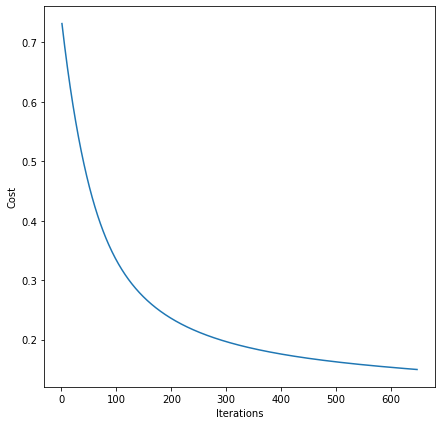

In [15]:
# Plotting the cost function against the number of iterations
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

fig = plt.figure(figsize=[7,7])
ax = fig.add_subplot(1,1,1)
ax.plot(np.arange(iter)+1,loss)
ax.set_ylabel('Cost')
ax.set_xlabel('Iterations')
fig.show()

### Using gradient checking to verify the custom implementation

In [16]:
# Creating the gradient vector of the cost function
dtheta = np.array([])
for l in range(L):
    dtheta = np.append(dtheta,dW[l].flatten())
    dtheta = np.append(dtheta,db[l].flatten())
dtheta

array([-0.00426023,  0.02755832,  0.00387759,  0.00124478,  0.00244373,
        0.00347004,  0.0011717 , -0.02027639,  0.00163784, -0.00445076,
        0.0084092 , -0.00181105, -0.00728694,  0.01000257,  0.00604911,
       -0.01423322,  0.00471166,  0.00220914, -0.00391723,  0.00592337,
       -0.00583757, -0.00313233,  0.00361917, -0.00690205,  0.00628534,
        0.00356521, -0.00176716,  0.01466623,  0.00729127,  0.00413946,
       -0.00414748,  0.008284  ,  0.01145364, -0.01226758,  0.007371  ,
        0.01483166, -0.00367235,  0.00841552, -0.04344287, -0.02049016,
        0.04478106])

In [17]:
# Creating a list of all parameters
P = b.copy()
for l in range(L):
    P.insert(2*l,W[l])

print(P)

[array([[-0.47212131, -0.16068759,  0.14794861],
       [ 0.01109504, -0.12347557,  0.40612833],
       [-0.69849706, -0.08003476,  0.14600144],
       [-0.30272018, -0.50594741, -0.29904912]]), array([[ 0.42484187],
       [ 0.05130814],
       [-0.34046101],
       [ 0.28858312]]), array([[ 0.0373258 ,  0.47558472, -0.73968589, -0.39146117],
       [-0.14578094, -0.55690607, -0.00375964,  0.31473865],
       [-0.93130409, -0.66318398,  1.1130561 , -0.33913283],
       [-0.28125399,  0.35492742,  0.43370201, -0.15200551]]), array([[-0.22822084],
       [ 0.2067205 ],
       [-0.56204863],
       [-0.23300232]]), array([[ 0.25365679, -0.30719803,  1.64647414,  0.43117253]]), array([[-0.8606525]])]


In [18]:
# Defining a function to index an element in the list of parameters
def loc(index,P):
    i = 0
    for p in P:
        if index<p.size:
            return i,np.unravel_index(index,p.shape)
        else:
            index -= p.size
            i += 1

loc(10,P)

(0, (3, 1))

In [19]:
# Defining a function to calculate the cost function

def cost(index,epsilon,X,Y,P,L):
    i = loc(index,P)
    P[i[0]][i[1]] += epsilon

    W = [P[i] for i in range(0,L*2,2)]
    b = [P[i] for i in range(1,L*2,2)]

    Z = []
    A = []
    for l in np.arange(L):
        Z.append(W[l]@A[l-1]+b[l] if l> 0 else W[l]@X+b[l])
        A.append(1/(1+np.exp(-Z[l])) if l==L-1 else np.tanh(Z[l]))
    
    P[i[0]][i[1]] -= epsilon
    return -1/m*(Y@np.log(A[L-1]).T+(1-Y)@np.log(1-A[L-1]).T)

cost(10,1e-7,X,Y,P,L)

array([[0.14957942]])

In [20]:
# Defining a function to calculate the partial derivative of the cost function with respect to a parameter

def partial(index,epsilon,X,Y,P,L):
    return (cost(index,epsilon,X,Y,P,L)-cost(index,-1*epsilon,X,Y,P,L))/(2*epsilon)

In [21]:
# Creating the approximate gradient vector of the cost function

dtheta_approx = np.array([])
for index in range(41):
    dtheta_approx = np.append(dtheta_approx,partial(index,1e-7,X,Y,P,L))

dtheta_approx

array([-0.00424866,  0.02758993,  0.00387583,  0.00124777,  0.00246551,
        0.00346638,  0.00116509, -0.02031098,  0.00162978, -0.00444397,
        0.00841751, -0.00181287, -0.00724725,  0.01000625,  0.00601047,
       -0.01421209,  0.00471   ,  0.00220715, -0.00391221,  0.00592254,
       -0.00583596, -0.00313003,  0.00361431, -0.00690132,  0.00628907,
        0.00356982, -0.00174518,  0.01467497,  0.00728865,  0.00413611,
       -0.00414115,  0.008284  ,  0.01143585, -0.01224858,  0.00731984,
        0.01480648, -0.00368096,  0.00841289, -0.04338572, -0.02047281,
        0.04470332])

In [22]:
G = np.linalg.norm(dtheta_approx - dtheta)/(np.linalg.norm(dtheta_approx) + np.linalg.norm(dtheta))
G

0.0008483014605131798

In [23]:
dtheta_approx - dtheta

array([ 1.15691930e-05,  3.16061659e-05, -1.76333410e-06,  2.98943489e-06,
        2.17772372e-05, -3.65654020e-06, -6.60553359e-06, -3.45867926e-05,
       -8.05460939e-06,  6.79184259e-06,  8.30972127e-06, -1.81434012e-06,
        3.96887189e-05,  3.67969658e-06, -3.86372233e-05,  2.11339176e-05,
       -1.66461664e-06, -1.98704447e-06,  5.01934568e-06, -8.23341342e-07,
        1.61811395e-06,  2.29365001e-06, -4.86683294e-06,  7.22525185e-07,
        3.73197318e-06,  4.61378388e-06,  2.19859454e-05,  8.74455618e-06,
       -2.61945414e-06, -3.35132098e-06,  6.33355206e-06,  4.03851003e-09,
       -1.77855776e-05,  1.89954999e-05, -5.11588709e-05, -2.51815520e-05,
       -8.60432434e-06, -2.63179667e-06,  5.71479601e-05,  1.73542644e-05,
       -7.77376414e-05])

## 4 Conclusion
Similar values of loss from 2 & 3 for the same number of iterations indicates that the custom gradient descent implementation is correct. The weights and biases are different because the 2 models are randomly initialised during training and the loss function of the shallow neural network has multiple maximia and minima.